In [21]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [23]:
#Fetch Images count from Fodlers

In [25]:
count = 0 
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

.ipynb_checkpoints Folder has 0 Images
Amphora Folder has 109 Images
Anabaena Folder has 344 Images
Anabaenopsis Folder has 83 Images
Aphanocapsa Folder has 90 Images
Chaestoceros Folder has 199 Images
Chlamydomonas Folder has 888 Images
Chlorella Folder has 297 Images
Chodatella Folder has 95 Images
Chroococcus Folder has 182 Images
Coscinodiscus Folder has 68 Images
Cryptomonas Folder has 314 Images
Cyclotella Folder has 128 Images
Dictyosphaerium Folder has 360 Images
Diploneis Folder has 165 Images
Euglena Folder has 1194 Images
Glenodinium Folder has 88 Images
Gomphosphaeria Folder has 94 Images
Gymnodinium Folder has 246 Images
Gyrodinium Folder has 24 Images
Gyrosigma Folder has 96 Images
Melosira Folder has 220 Images
Microcystis Folder has 300 Images
Navicula Folder has 341 Images
Nitzschia Folder has 221 Images
Oocystis Folder has 176 Images
Pediastrum Folder has 249 Images
Peridinium Folder has 218 Images
Phacus Folder has 412 Images
Pinnularia Folder has 60 Images
Prorocent

In [27]:
#Load Images into Arrays as Dataset

In [29]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [31]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 8577 files belonging to 34 classes.
Using 6862 files for training.
Found 8577 files belonging to 34 classes.
Using 1715 files for validation.


In [32]:
algae_names = train_ds.class_names
algae_names

['Amphora',
 'Anabaena',
 'Anabaenopsis',
 'Aphanocapsa',
 'Chaestoceros',
 'Chlamydomonas',
 'Chlorella',
 'Chodatella',
 'Chroococcus',
 'Coscinodiscus',
 'Cryptomonas',
 'Cyclotella',
 'Dictyosphaerium',
 'Diploneis',
 'Euglena',
 'Glenodinium',
 'Gomphosphaeria',
 'Gymnodinium',
 'Gyrodinium',
 'Gyrosigma',
 'Melosira',
 'Microcystis',
 'Navicula',
 'Nitzschia',
 'Oocystis',
 'Pediastrum',
 'Peridinium',
 'Phacus',
 'Pinnularia',
 'Prorocentrum',
 'Scenedesmus',
 'Spirulina',
 'Tetraselmis',
 'Treubaria']

In [33]:
import matplotlib.pyplot as plt

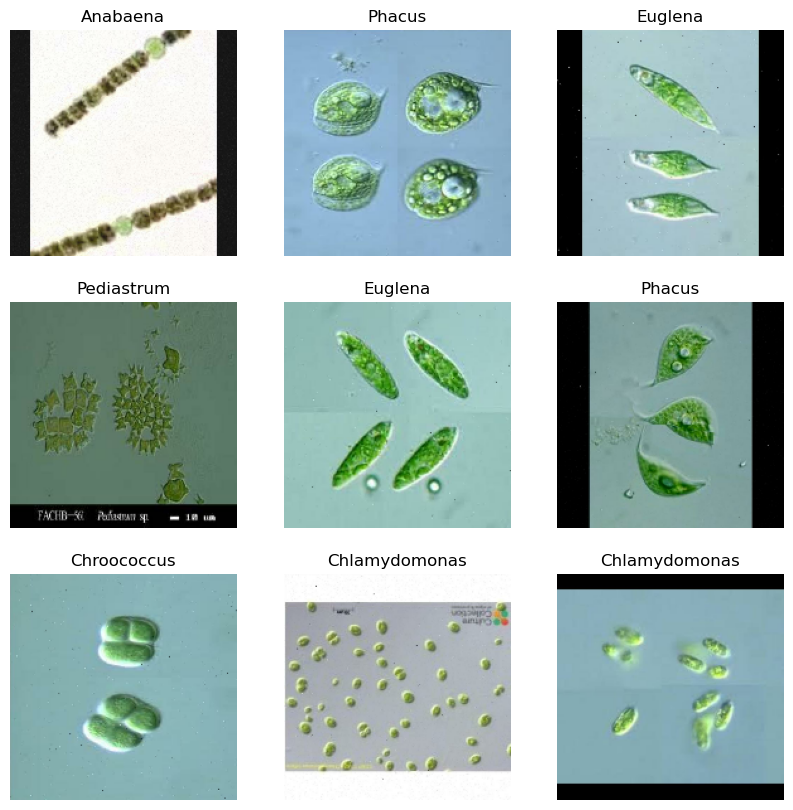

In [34]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(algae_names[labels[i]])
        plt.axis('off')

In [35]:
AUTOTUNE = tf.data.AUTOTUNE

In [36]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [37]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [38]:
#Data Augmentation

In [39]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

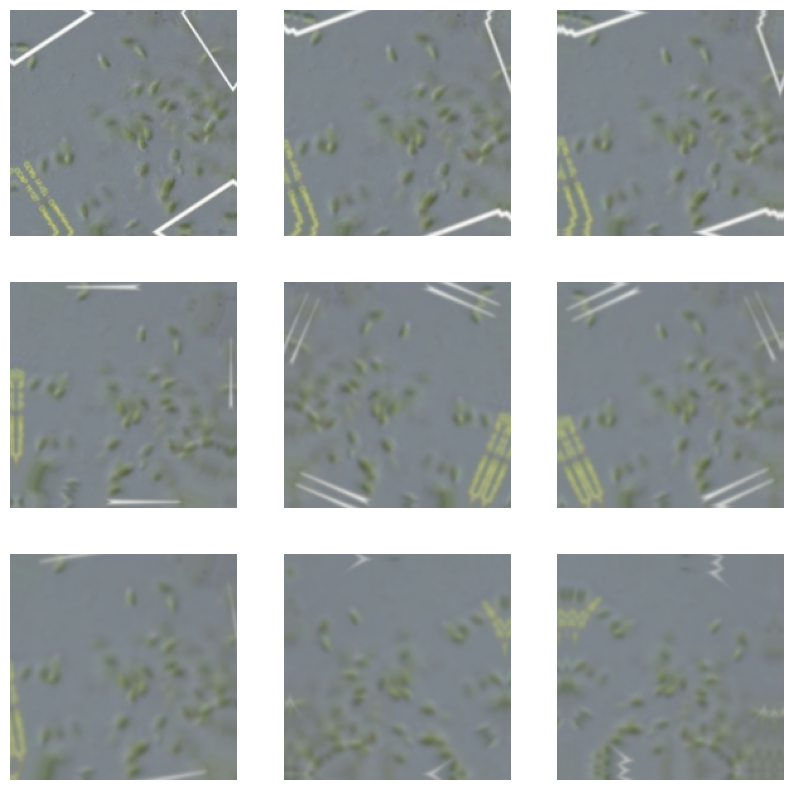

In [49]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [50]:
#MOdel Creation

In [51]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(34)
])

In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 34)                  │           4,386 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,993,026 (15.23 MB)

 Trainable params: 3,993,026 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 35s 161ms/step - accuracy: 0.7982 - loss: 0.5969 - val_accuracy: 0.7557 - val_loss: 0.8100
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 181ms/step - accuracy: 0.8038 - loss: 0.5938 - val_accuracy: 0.7603 - val_loss: 0.7435
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 40s 184ms/step - accuracy: 0.8166 - loss: 0.5396 - val_accuracy: 0.7732 - val_loss: 0.7127
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 40s 185ms/step - accuracy: 0.8405 - loss: 0.4684 - val_accuracy: 0.7813 - val_loss: 0.6892
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - accuracy: 0.8563 - loss: 0.4377 - val_accuracy: 0.7586 - val_loss: 0.8089
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 40s 184ms/step - accuracy: 0.8688 - loss: 0.3859 - val_accuracy: 0.7942 - val_loss: 0.6612
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - accuracy: 0.8667 - loss: 0.3988 - val_accuracy: 0.8268 - val_loss: 0.5789
Epoch 8/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 183ms/step - accuracy: 0.8746 - loss: 0

In [71]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + algae_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [89]:
#enter jpg file to classify algae
classify_images('Samples/anabaenasample.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


'The Image belongs to Anabaena with a score of 99.99330043792725'

In [79]:
model.save('Algae_Recog_Model.h5')